In [18]:
!pip install requests beautifulsoup4 pandas matplotlib


In [19]:

#  PROJECT: Clinical Trials Scraper


import requests
import pandas as pd
import matplotlib.pyplot as plt

print("Libraries Loaded ")

# SET DISEASE

disease = "diabetes"   # change as needed
print(f"Fetching trials for: {disease}")


# FETCH DATA FROM API

url = "https://clinicaltrials.gov/api/v2/studies"

params = {
    "format": "json",
    "query.cond": disease,
    "pageSize": 200
}

response = requests.get(url, params=params).json()
studies = response.get("studies", [])

print("Trials found:", len(studies))
print("API Success ")


# EXTRACT FIELDS SAFELY


data = []

for s in studies:

    protocol = s.get("protocolSection", {})

    # Safe modules
    identify = protocol.get("identificationModule", {})
    statusM = protocol.get("statusModule", {})
    design = protocol.get("designModule", {})
    intervent = protocol.get("interventionsModule", {})

    # Extract fields safely
    title = identify.get("officialTitle")
    status = statusM.get("overallStatus")
    phase = design.get("phases")
    enrollment = design.get("enrollmentCount")

    # Handle interventions safely
    interventions_list = intervent.get("interventions", None)
    if interventions_list:
        drugs = ", ".join([i.get("name", "") for i in interventions_list])
    else:
        drugs = None

    data.append([title, status, phase, enrollment, drugs])

df = pd.DataFrame(data, columns=["Title", "Status", "Phase", "Enrollment", "Drug"])
print("DataFrame Created ✔️")
df.head()


Libraries Loaded 
Fetching trials for: diabetes
Trials found: 200
API Success 
DataFrame Created ✔️


,Title,Status,Phase,Enrollment,Drug
0,"A Multicenter, Randomized, Double-Blind, Place...",COMPLETED,[PHASE3],None,None
1,Ninja 2 User Performance Evaluation,COMPLETED,[NA],None,None
2,South Danish Diabetes Study: A Prospective Ran...,COMPLETED,[PHASE4],None,None
3,Transdisciplinary Care for Young Adults With T...,RECRUITING,[NA],None,None
4,None,UNKNOWN,None,None,None


In [23]:

# CLEAN DATA

df['Phase'] = df['Phase'].fillna("Unknown")
df['Status'] = df['Status'].fillna("Unknown")
df['Enrollment'] = df['Enrollment'].fillna("Not reported")
df['Drug'] = df['Drug'].fillna("Not Mentioned")

print("Cleaning Done ")



# SAVE TO CSV

file_name = f"clinical_trials_{disease}.csv"
df.to_csv(file_name, index=False)
print("CSV Saved:", file_name)
from google.colab import files
files.download(file_name)



Cleaning Done 
CSV Saved: clinical_trials_diabetes.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

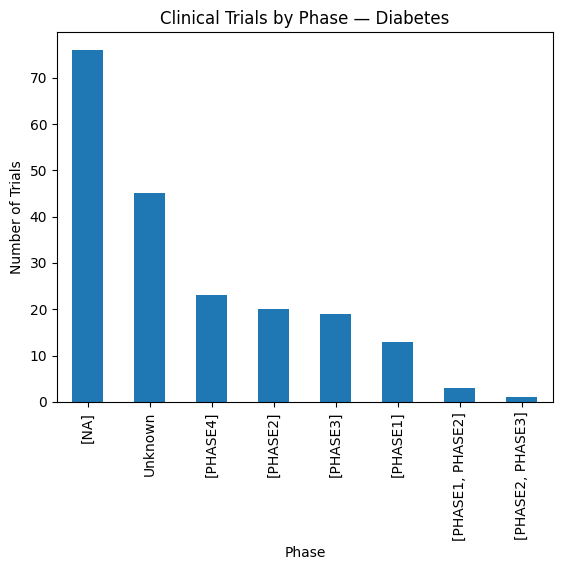

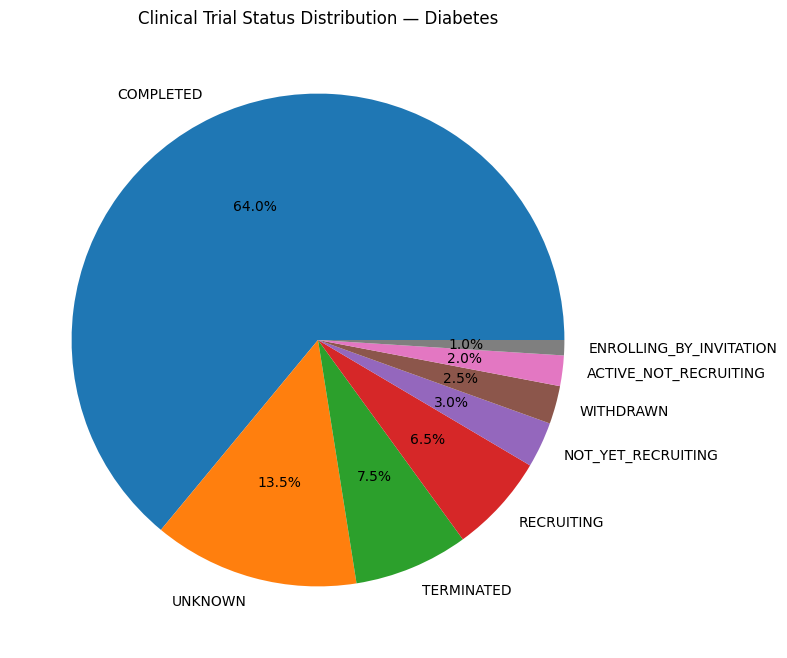

In [21]:

# TRIALS BY PHASE
df['Phase'].value_counts().plot(kind='bar')
plt.title(f"Clinical Trials by Phase — {disease.capitalize()}")
plt.xlabel("Phase")
plt.ylabel("Number of Trials")
plt.show()


# TRIALS BY STATUS

plt.figure(figsize=(8,8))
df['Status'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title(f"Clinical Trial Status Distribution — {disease.capitalize()}")
plt.ylabel("")
plt.show()


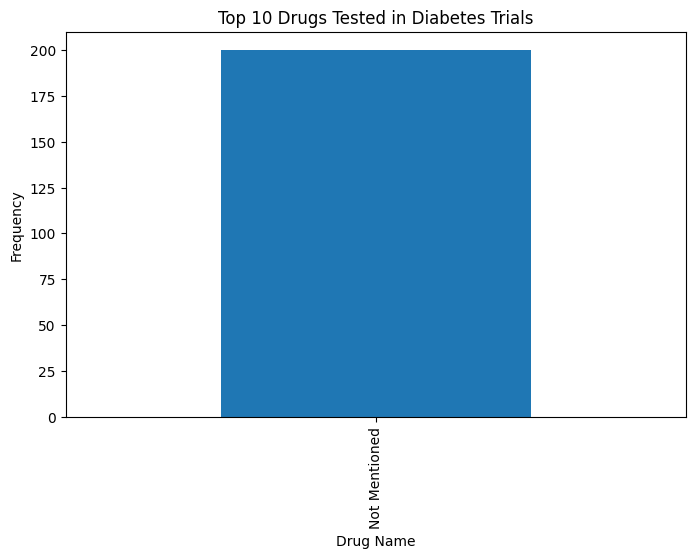

In [22]:
# TOP 10 DRUGS USED N CLINICAL TRAILS
# Split multiple drugs
drug_series = df['Drug'].str.split(", ", expand=True).stack()

drug_counts = drug_series.value_counts().head(10)

plt.figure(figsize=(8,5))
drug_counts.plot(kind='bar')
plt.title(f"Top 10 Drugs Tested in {disease.capitalize()} Trials")
plt.xlabel("Drug Name")
plt.ylabel("Frequency")
plt.show()
